# Detectando Outliers

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn import datasets

%matplotlib inline
rcParams['figure.figsize'] = 8,6

In [14]:
iris = datasets.load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                 columns=iris['feature_names'] + ['Species'])
# df.head()

# df = pd.read_csv('bases/iris.data.csv', header=None, sep=',')
# df.columns = ['Tam Sepala', 'Lrg Sepala', 'Tam Petala', 'Lrg Petala', 'Especies']
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Identificando Outliers pelo Diagrama de Caixa

[]

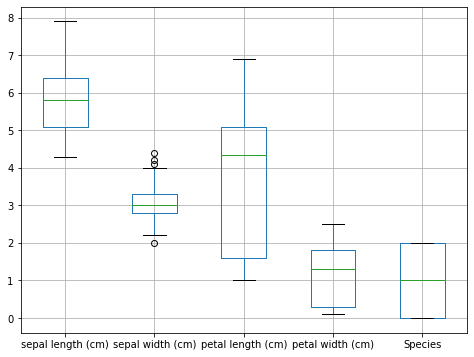

In [21]:
df.boxplot(return_type='dict')
plt.plot()

In [8]:
pd.options.display.float_format = '{:.1f}'.format
X_df = pd.DataFrame(X)
z = X_df.describe()
print(z)

          0     1     2     3
count 150.0 150.0 150.0 150.0
mean    5.8   3.1   3.8   1.2
std     0.8   0.4   1.8   0.8
min     4.3   2.0   1.0   0.1
25%     5.1   2.8   1.6   0.3
50%     5.8   3.0   4.3   1.3
75%     6.4   3.3   5.1   1.8
max     7.9   4.4   6.9   2.5


In [9]:
# -----------------------------
# Lembrar que:
# IQR (InterQuartile Range) = 3ºQ - 1ºQ
# E outliers são definidos as observações abaixo de "Q1 − (1.5 x IQR)" ou acima de "Q3 + (1.5 x IQR)".
# -----------------------------
for t in z:
    iqr = z[t][6] - z[t][4]
    extMenor = z[t][4] - (iqr * 1.5)
    extMaior = z[t][6] + (iqr * 1.5)
    print('Em %d Outliers estão abaixo de %.2f e acima de %.2f' % (t, extMenor, extMaior))

Em 0 Outliers estão abaixo de 3.15 e acima de 8.35
Em 1 Outliers estão abaixo de 2.05 e acima de 4.05
Em 2 Outliers estão abaixo de -3.65 e acima de 10.35
Em 3 Outliers estão abaixo de -1.95 e acima de 4.05


In [11]:
# Isolando
lrg_sepala = X[:,1]
iris_outliers = (lrg_sepala > 4.05)
df[iris_outliers]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
15,5.7,4.4,1.5,0.4,0.0
32,5.2,4.1,1.5,0.1,0.0
33,5.5,4.2,1.4,0.2,0.0


In [12]:
lrg_sepala = X[:,1]
iris_outliers = (lrg_sepala < 2.05)
df[iris_outliers]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
60,5.0,2.0,3.5,1.0,1.0
